In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv("cleaned_common_accident_vehicle_records.csv", encoding='latin1')  

columns = [
    'Speed_limit', 
    'Time', 
    'Road_Surface_Conditions', 
    'Number_of_Casualties',
    'Day_of_Week',
    'Accident_Severity',
    'Date'
]

cas_data = data[columns]

print(cas_data.describe())

       Speed_limit  Number_of_Casualties
count   528,335.00            528,335.00
mean         39.31                  1.45
std          14.29                  0.96
min          10.00                  1.00
25%          30.00                  1.00
50%          30.00                  1.00
75%          50.00                  2.00
max          70.00                 68.00


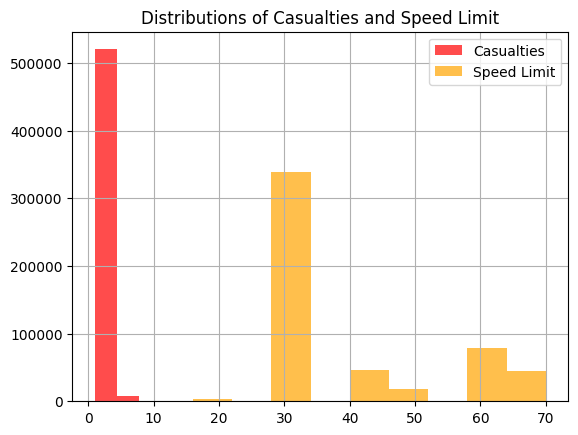

In [145]:
# Distribution Histogram
cas_data['Number_of_Casualties'].hist(bins=20, alpha=0.7, label='Casualties', color='red')
cas_data['Speed_limit'].hist(bins=10, alpha=0.7, label='Speed Limit', color='orange')
plt.legend()
plt.title('Distributions of Casualties and Speed Limit')
plt.show()

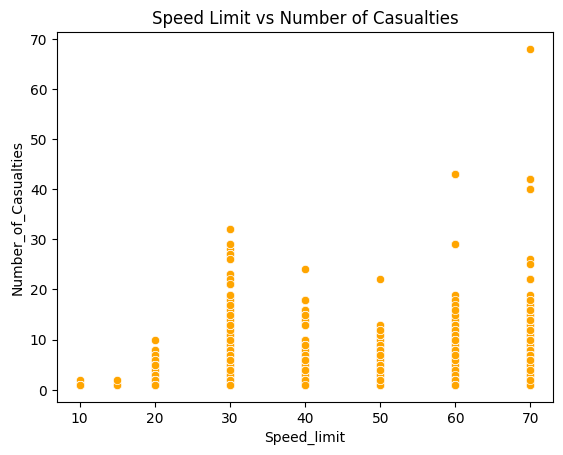

In [146]:
# Speed limit - Casualties Relation

sb.scatterplot(x='Speed_limit', y='Number_of_Casualties', data=cas_data, color='orange')
plt.title('Speed Limit vs Number of Casualties')
plt.show()

# Higher allowed speed leads to more lethal accidents
# Spike at speed_limit 30
    # Generally 30 mph speed limits are in urban areas



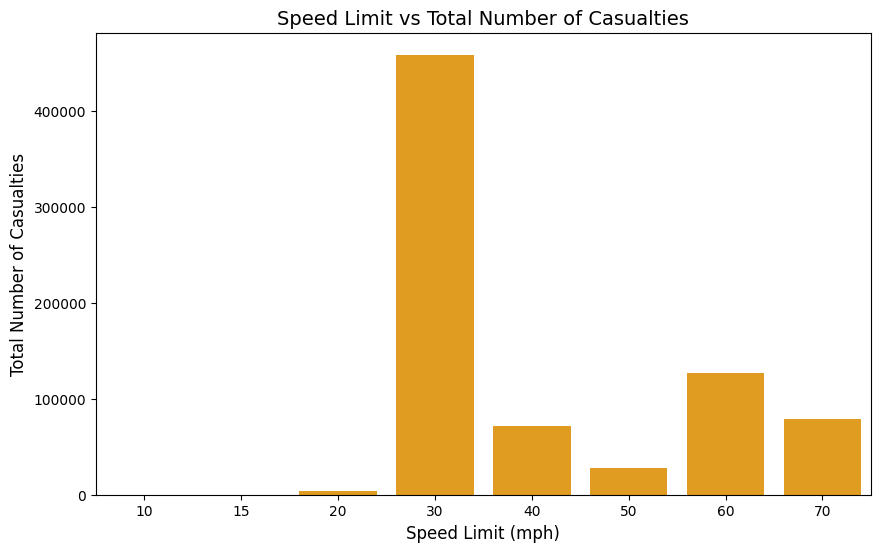

In [147]:
# Import necessary libraries
import seaborn as sb
import matplotlib.pyplot as plt

# Group the data by Speed_limit and calculate the sum of casualties
speed_limit_casualties = cas_data.groupby('Speed_limit')['Number_of_Casualties'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(x='Speed_limit', y='Number_of_Casualties', data=speed_limit_casualties, color='orange')

# Set title and labels
plt.title('Speed Limit vs Total Number of Casualties', fontsize=14)
plt.xlabel('Speed Limit (mph)', fontsize=12)
plt.ylabel('Total Number of Casualties', fontsize=12)

# Show the plot
plt.show()

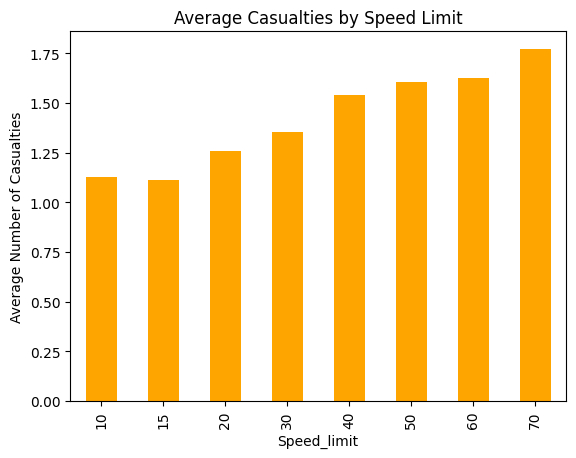

In [148]:
# Speed limit - Casualties Relation

casualties_by_speed = cas_data.groupby('Speed_limit')['Number_of_Casualties'].mean()
casualties_by_speed.plot(kind='bar', title='Average Casualties by Speed Limit', color='orange')
plt.ylabel('Average Number of Casualties')
plt.show()

# Higher allowed speed leads to more lethal accidents


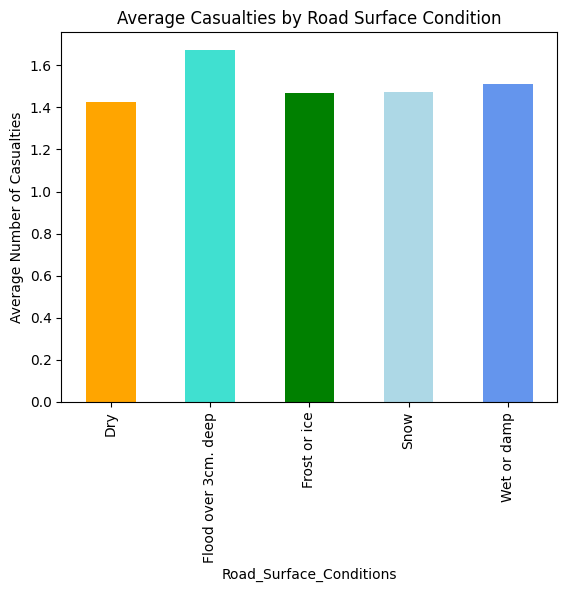

In [149]:
# Road Surface Conditions - Casualties Relation

casualties_by_surface = cas_data.groupby('Road_Surface_Conditions')['Number_of_Casualties'].mean()

colors = ['orange', 'turquoise', 'green', '#ADD8E6', 'cornflowerblue'] 

casualties_by_surface.plot(kind='bar', title='Average Casualties by Road Surface Condition', color=colors)
plt.ylabel('Average Number of Casualties')
plt.show()

# not too interesting alone


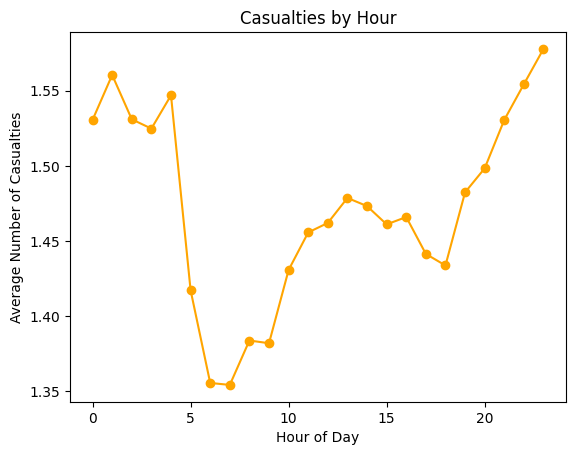

In [150]:
# Time of Day - Casualties Relation

# cas_data.loc[:, 'Hour'] = pd.to_datetime(cas_data['Time'], format='%H:%M').dt.hour
cas_data = cas_data.copy()
cas_data['Hour'] = pd.to_datetime(cas_data['Time'], format='%H:%M').dt.hour

hourly_trends = cas_data.groupby('Hour')['Number_of_Casualties'].mean()
hourly_trends.plot(kind='line', title='Casualties by Hour', marker='o', color='orange')
plt.ylabel('Average Number of Casualties')
plt.xlabel('Hour of Day')
plt.show()



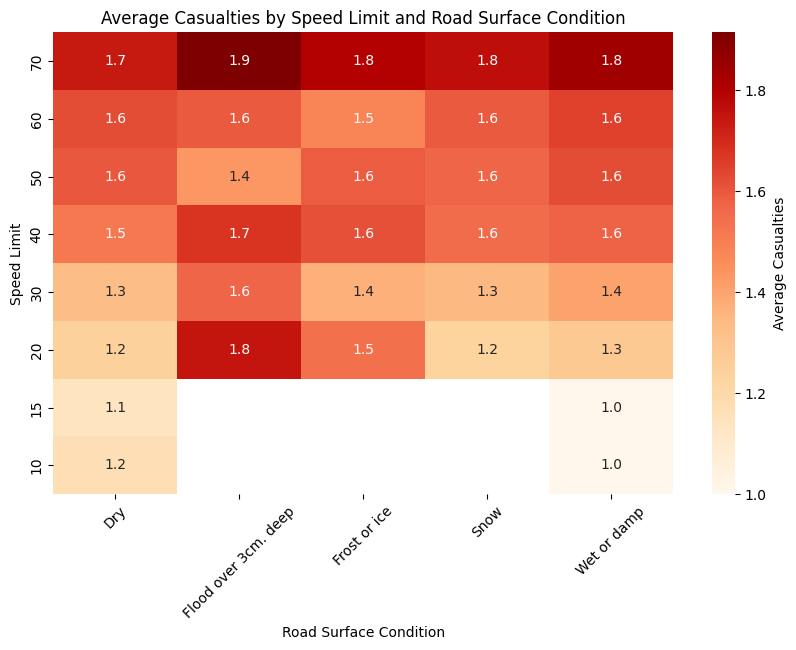

In [151]:
# Speed limit - Casualties Relation with RSC pivot
# Heatmap

combined_data = data.groupby(['Speed_limit', 'Road_Surface_Conditions'])['Number_of_Casualties'].mean().unstack()
combined_data = combined_data.sort_index(ascending=False)
plt.figure(figsize=(10, 6))
sb.heatmap(combined_data, cmap='OrRd', annot=True, fmt=".1f", cbar_kws={'label': 'Average Casualties'})
plt.title('Average Casualties by Speed Limit and Road Surface Condition')
plt.ylabel('Speed Limit')
plt.xlabel('Road Surface Condition')
plt.xticks(rotation=45)
plt.show()



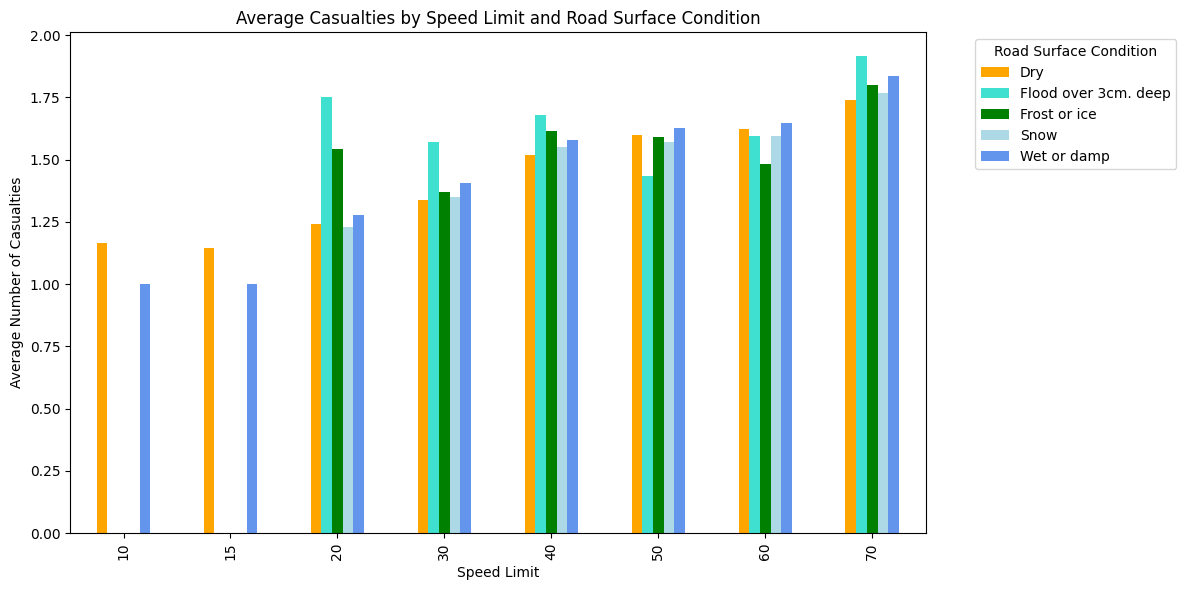

In [152]:
# Speed limit - Casualties Relation with RSC pivot
# Bar graph

grouped_data = data.groupby(['Speed_limit', 'Road_Surface_Conditions'])['Number_of_Casualties'].mean().reset_index()
pivot_data = grouped_data.pivot(index='Speed_limit', columns='Road_Surface_Conditions', values='Number_of_Casualties')

colors = ['orange', 'turquoise', 'green', '#ADD8E6', 'cornflowerblue'] 

pivot_data.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Average Casualties by Speed Limit and Road Surface Condition')
plt.ylabel('Average Number of Casualties')
plt.xlabel('Speed Limit')
plt.legend(title='Road Surface Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



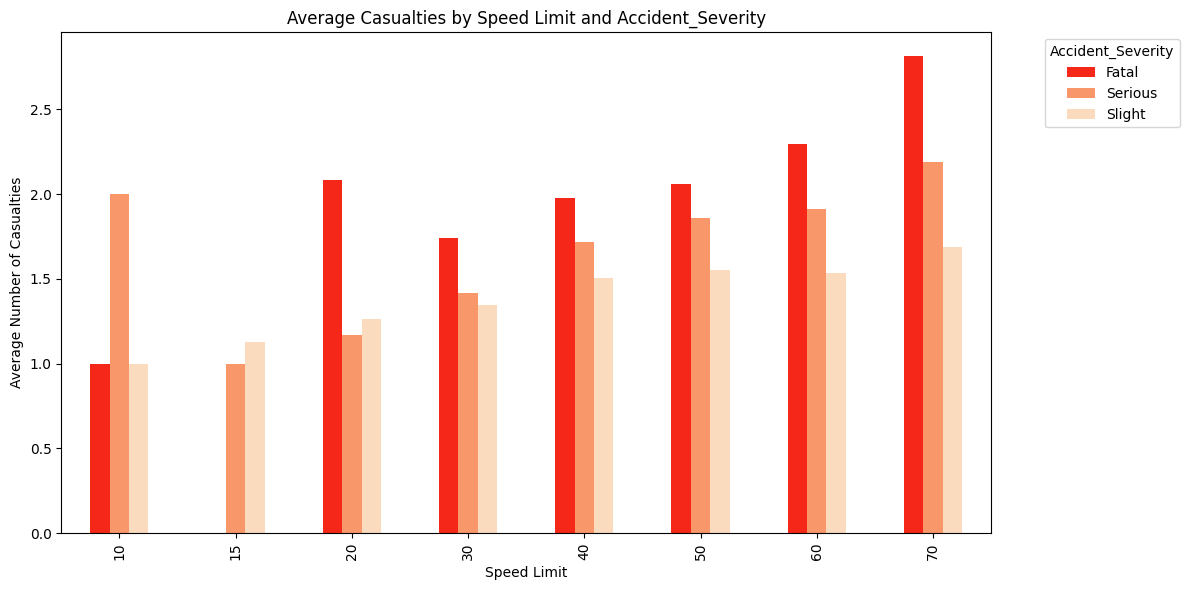

In [153]:
# Speed limit - Casualties Relation with Severity pivot
# Bar graph

grouped_data = data.groupby(['Speed_limit', 'Accident_Severity'])['Number_of_Casualties'].mean().reset_index()
pivot_data = grouped_data.pivot(index='Speed_limit', columns='Accident_Severity', values='Number_of_Casualties')

colors = ['#f52718', '#f7976a', '#fadbbe'] 

pivot_data.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Average Casualties by Speed Limit and Accident_Severity')
plt.ylabel('Average Number of Casualties')
plt.xlabel('Speed Limit')
plt.legend(title='Accident_Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Spikes in fatal and serious on 30mph and 10mph respectively


In [ ]:
# checking if the gaps of data exists in the full csv
# it still does

# data2 = pd.read_csv("accident_data.csv", encoding='latin1')  

# columns2 = [
#     'Number__of_Casualties',
#     'Road_Surface_Conditions',
#     'Speed_limit'
# ]

# # Group by Speed_limit and Road_Surface_Conditions to calculate average casualties
# avg_casualties = data2.groupby(['Speed_limit', 'Road_Surface_Conditions'])['Number_of_Casualties'].mean().reset_index()

# # Set up the seaborn style
# sb.set(style="whitegrid")

# # Create the bar plot
# plt.figure(figsize=(10, 6))
# sb.barplot(data=avg_casualties, x='Speed_limit', y='Number_of_Casualties', hue='Road_Surface_Conditions')

# # Customize the plot
# plt.title('Average Casualties by Speed Limit and Road Surface Condition', fontsize=16)
# plt.xlabel('Speed Limit', fontsize=12)
# plt.ylabel('Average Number of Casualties', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()


In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = pd.get_dummies(data[['Speed_limit', 'Road_Surface_Conditions']])
target = data['Number_of_Casualties']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.8860156369655237


In [ ]:
# Set up Apriori, make new bool columns from existing columns

cas_data['SpeedLimit_10'] = cas_data['Speed_limit'].apply(lambda x: 1 if x == 10 else 0)
cas_data['SpeedLimit_20'] = cas_data['Speed_limit'].apply(lambda x: 1 if x == 20 else 0)
cas_data['SpeedLimit_30'] = cas_data['Speed_limit'].apply(lambda x: 1 if x == 30 else 0)
cas_data['SpeedLimit_40'] = cas_data['Speed_limit'].apply(lambda x: 1 if x == 40 else 0)
cas_data['SpeedLimit_50'] = cas_data['Speed_limit'].apply(lambda x: 1 if x == 50 else 0)
cas_data['SpeedLimit_60'] = cas_data['Speed_limit'].apply(lambda x: 1 if x == 60 else 0)
cas_data['SpeedLimit_70'] = cas_data['Speed_limit'].apply(lambda x: 1 if x == 70 else 0)

cas_data['Casualties_0'] = cas_data['Number_of_Casualties'].apply(lambda x: 1 if x == 0 else 0)
cas_data['Casualties_1'] = cas_data['Number_of_Casualties'].apply(lambda x: 1 if x == 1 else 0)
cas_data['Casualties_2'] = cas_data['Number_of_Casualties'].apply(lambda x: 1 if x == 2 else 0)
cas_data['Casualties_3'] = cas_data['Number_of_Casualties'].apply(lambda x: 1 if x == 3 else 0)

road_conditions = ['Dry', 'Flood Over cm. deep', 'Frost or Ice', 'Snow', 'Wet or Damp']

for condition in road_conditions:
    cas_data[f'RoadIs_{condition.replace(" ", "")}'] = cas_data['Road_Surface_Conditions'].apply(lambda x: 1 if x == condition else 0)
    # print(f'{condition.replace(" ", "")}')


In [240]:
# perform apriori
from mlxtend.frequent_patterns import apriori, association_rules

# Select only the relevant columns
columns_of_interest = ['SpeedLimit_10', 'SpeedLimit_20', 'SpeedLimit_30', 'SpeedLimit_40', 'SpeedLimit_50',
                       'SpeedLimit_60', 'SpeedLimit_70', 'RoadIs_Dry', 'RoadIs_FloodOvercm.deep', 'RoadIs_FrostorIce',
                       'RoadIs_Snow', 'RoadIs_WetorDamp', 'Casualties_0', 'Casualties_1', 'Casualties_2', 'Casualties_3',]

apriori_data = cas_data[columns_of_interest]
frequent_itemsets = apriori(apriori_data, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, None, metric="lift", min_threshold=1)

# rules_col = ["antecedents", "consequents", "antecedent support", "consequent support", "support", "confidence", "lift"]
rules_col = ["antecedents", "consequents", "support", "confidence", "lift"]

rules = rules[rules_col]

# Display the rules
print(rules)


c:\Users\griin\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                      antecedents                    consequents  support  \
0                    (RoadIs_Dry)                (SpeedLimit_30)     0.46   
1                 (SpeedLimit_30)                   (RoadIs_Dry)     0.46   
2                  (Casualties_1)                (SpeedLimit_30)     0.49   
3                 (SpeedLimit_30)                 (Casualties_1)     0.49   
4                  (Casualties_2)                (SpeedLimit_60)     0.04   
5                 (SpeedLimit_60)                 (Casualties_2)     0.04   
6                  (Casualties_1)                   (RoadIs_Dry)     0.50   
7                    (RoadIs_Dry)                 (Casualties_1)     0.50   
8      (Casualties_1, RoadIs_Dry)                (SpeedLimit_30)     0.35   
9   (Casualties_1, SpeedLimit_30)                   (RoadIs_Dry)     0.35   
10    (RoadIs_Dry, SpeedLimit_30)                 (Casualties_1)     0.35   
11                 (Casualties_1)    (RoadIs_Dry, SpeedLimit_30)     0.35   

In [237]:
# Create and Clean rules2
rules2 = rules.copy()
round_num = 6

rules2['Antecedents'] = rules2['antecedents'].apply(lambda x: ', '.join(x))
rules2['Consequents'] = rules2['consequents'].apply(lambda x: ', '.join(x))
rules2['Support'] = rules2['support'].round(round_num)
rules2['Confidence'] = rules2['confidence'].round(round_num)
rules2['Lift'] = rules2['lift'].round(round_num)

rules2 = rules2.drop(columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

print(rules2)

                  Antecedents                  Consequents  Support  \
0                  RoadIs_Dry                SpeedLimit_30     0.46   
1               SpeedLimit_30                   RoadIs_Dry     0.46   
2                Casualties_1                SpeedLimit_30     0.49   
3               SpeedLimit_30                 Casualties_1     0.49   
4                Casualties_2                SpeedLimit_30     0.11   
..                        ...                          ...      ...   
93  SpeedLimit_70, RoadIs_Dry                 Casualties_2     0.01   
94   Casualties_2, RoadIs_Dry                SpeedLimit_70     0.01   
95              SpeedLimit_70     Casualties_2, RoadIs_Dry     0.01   
96               Casualties_2    SpeedLimit_70, RoadIs_Dry     0.01   
97                 RoadIs_Dry  SpeedLimit_70, Casualties_2     0.01   

    Confidence  Lift  
0         0.67  1.05  
1         0.72  1.05  
2         0.69  1.07  
3         0.76  1.07  
4         0.56  0.87  
..       

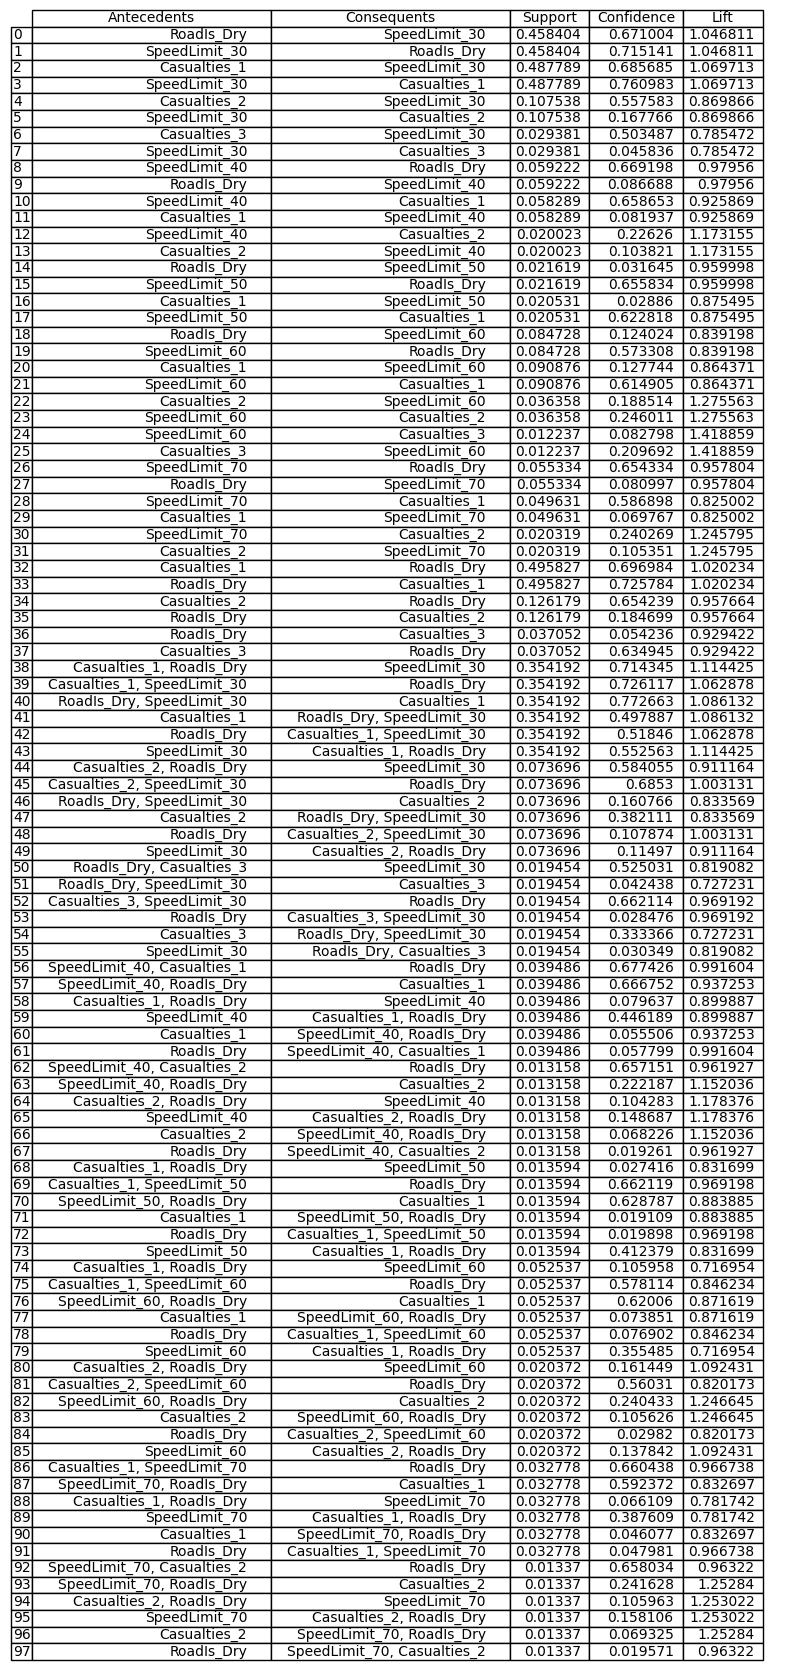

In [238]:
# rules2 panda table
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(10, 5)) 
ax.axis('off')
table_data = table(ax, rules2, loc='center')

table_data.auto_set_font_size(False)
table_data.set_fontsize(10)
table_data.auto_set_column_width([0, 1, 2, 3, 4, 5])


plt.show()

In [239]:
# best looking presentation
styled_rules = rules2.style.background_gradient(
    subset=['Confidence', 'Lift', 'Support'], cmap='Reds'
).set_caption("Association Rules with Key Metrics Highlighted (min_support = 0.03, min_lift = 1)")
styled_rules


,Antecedents,Consequents,Support,Confidence,Lift
0,RoadIs_Dry,SpeedLimit_30,0.458404,0.671004,1.046811
1,SpeedLimit_30,RoadIs_Dry,0.458404,0.715141,1.046811
2,Casualties_1,SpeedLimit_30,0.487789,0.685685,1.069713
3,SpeedLimit_30,Casualties_1,0.487789,0.760983,1.069713
4,Casualties_2,SpeedLimit_30,0.107538,0.557583,0.869866
5,SpeedLimit_30,Casualties_2,0.107538,0.167766,0.869866
6,Casualties_3,SpeedLimit_30,0.029381,0.503487,0.785472
7,SpeedLimit_30,Casualties_3,0.029381,0.045836,0.785472
8,SpeedLimit_40,RoadIs_Dry,0.059222,0.669198,0.979560
9,RoadIs_Dry,SpeedLimit_40,0.059222,0.086688,0.979560


In [178]:
# Loop through rows and calculate Confidence * Lift for each row
rules2['Confidence * Lift'] = 0  # Add a new column for the result

for index, row in rules2.iterrows():
    rules2.at[index, 'Confidence * Lift'] = row['Confidence'] * row['Lift']

# Display the updated DataFrame with the new column
print(rules2)



                    Antecedents                  Consequents  Support  \
0                    RoadIs_Dry                SpeedLimit_30     0.46   
1                 SpeedLimit_30                   RoadIs_Dry     0.46   
2                  Casualties_1                SpeedLimit_30     0.49   
3                 SpeedLimit_30                 Casualties_1     0.49   
4                 SpeedLimit_40                 Casualties_2     0.02   
5                  Casualties_2                SpeedLimit_40     0.02   
6                  Casualties_2                SpeedLimit_60     0.04   
7                 SpeedLimit_60                 Casualties_2     0.04   
8                 SpeedLimit_60                 Casualties_3     0.01   
9                  Casualties_3                SpeedLimit_60     0.01   
10                SpeedLimit_70                 Casualties_2     0.02   
11                 Casualties_2                SpeedLimit_70     0.02   
12                 Casualties_1                   R

C:\Users\griin\AppData\Local\Temp\ipykernel_12956\2787231881.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.702414368244' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  rules2.at[index, 'Confidence * Lift'] = row['Confidence'] * row['Lift']


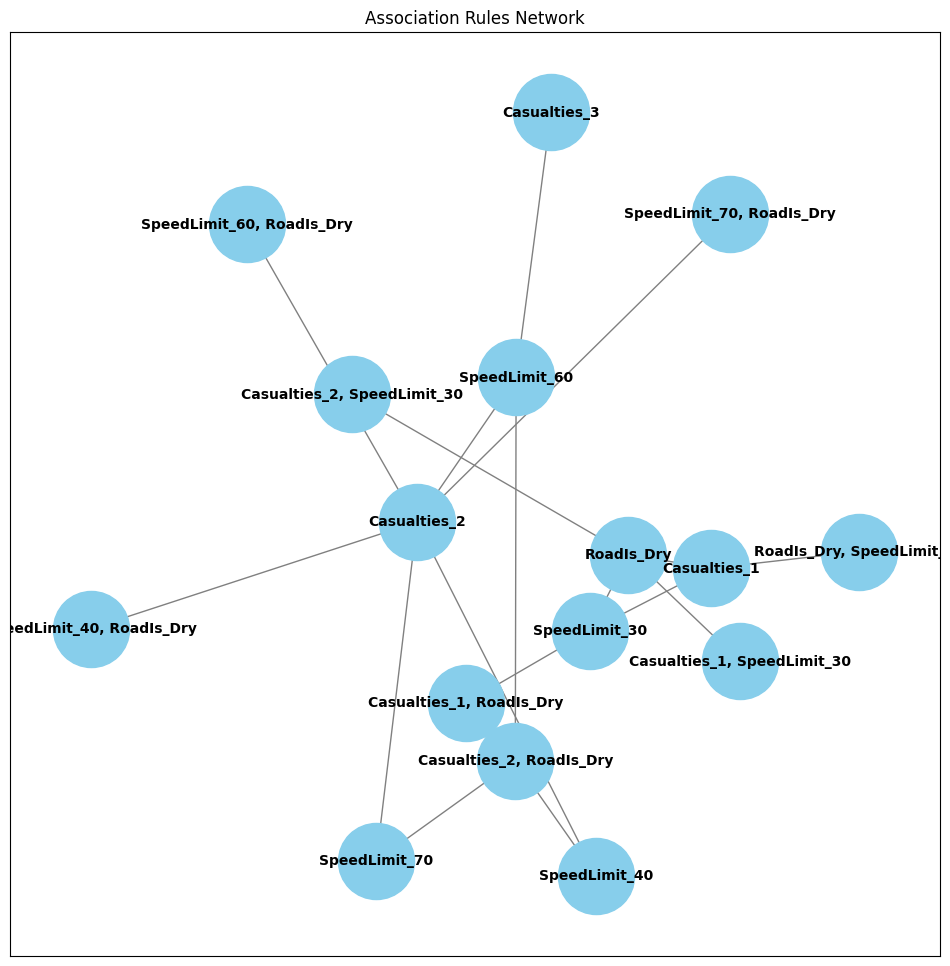

In [179]:
# BALLS
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

for _, rule in rules2.iterrows():
    antecedent = str(rule['Antecedents'])
    consequent = str(rule['Consequents'])
    
    G.add_edge(antecedent, consequent, weight=rule['Confidence'])

pos = nx.spring_layout(G, k=0.15, iterations=20)
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Association Rules Network")

plt.show()
